Import package

In [348]:
import io
import os
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

Loading data

In [349]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

Read

In [350]:
vcfdata = read_vcf('HW2_2_python_clinvar.vcf')
vcfdata['INFO']

0        ALLELEID=1003021;CLNDISDB=MedGen:CN517202;CLND...
1        ALLELEID=1632777;CLNDISDB=MedGen:CN517202;CLND...
2        ALLELEID=1600580;CLNDISDB=MedGen:CN517202;CLND...
3        ALLELEID=1396033;CLNDISDB=MedGen:CN517202;CLND...
4        ALLELEID=1570515;CLNDISDB=MedGen:CN517202;CLND...
                               ...                        
99967    AF_EXAC=0.00002;ALLELEID=1002493;CLNDISDB=MOND...
99968    ALLELEID=57519;CLNDISDB=MONDO:MONDO:0010169,Me...
99969    ALLELEID=1572196;CLNDISDB=MedGen:CN517202;CLND...
99970    ALLELEID=1467255;CLNDISDB=MedGen:CN517202;CLND...
99971    ALLELEID=1296249;CLNDISDB=MedGen:CN517202;CLND...
Name: INFO, Length: 99972, dtype: object

Problem1 CLNSIG Extract

In [351]:
temp0 = vcfdata['INFO'].str.extract('(CLNSIG=.+;)')
temp1 = temp0[0].str.split(';',expand=True)
temp2 = temp1[0].str.split('|',expand=True)


Problem1 Groupby

In [352]:
print(temp2.groupby([0]).size())
print(temp2.groupby([1]).size())
print(temp2.groupby([2]).size())

0
CLNSIG=Affects                                            17
CLNSIG=Benign                                          13977
CLNSIG=Benign/Likely_benign                             2001
CLNSIG=Conflicting_interpretations_of_pathogenicity     4179
CLNSIG=Likely_benign                                   28732
CLNSIG=Likely_pathogenic                                3625
CLNSIG=Pathogenic                                       6498
CLNSIG=Pathogenic/Likely_pathogenic                     1058
CLNSIG=Uncertain_significance                          39128
CLNSIG=association                                        58
CLNSIG=drug_response                                      31
CLNSIG=not_provided                                      565
CLNSIG=other                                               5
CLNSIG=protective                                          2
CLNSIG=risk_factor                                        44
dtype: int64
1
_association     2
_other          11
_risk_factor    12
dtype: int6

Problem1 Count

In [353]:
temp2_0 = temp2[0].str.strip('CLNSIG')
temp2_0 = temp2_0.str.strip('=')
temp2_1 = temp2[1].dropna()
temp2_1 = temp2_1.str.strip('_')
temp2_2 = temp2[2].dropna()
temp2_2 = temp2_2.str.strip('_')
temp3 = pd.concat([temp2_0,temp2_1,temp2_2])
counttemp = temp3.value_counts()
counttemp = counttemp.sort_index(ascending=0)
counttemp


risk_factor                                        56
protective                                          3
other                                              16
not_provided                                      565
drug_response                                      31
association                                        60
Uncertain_significance                          39128
Pathogenic/Likely_pathogenic                     1058
Pathogenic                                       6498
Likely_pathogenic                                3625
Likely_benign                                   28732
Conflicting_interpretations_of_pathogenicity     4179
Benign/Likely_benign                             2001
Benign                                          13977
Affects                                            17
dtype: int64

Problem1 Plot

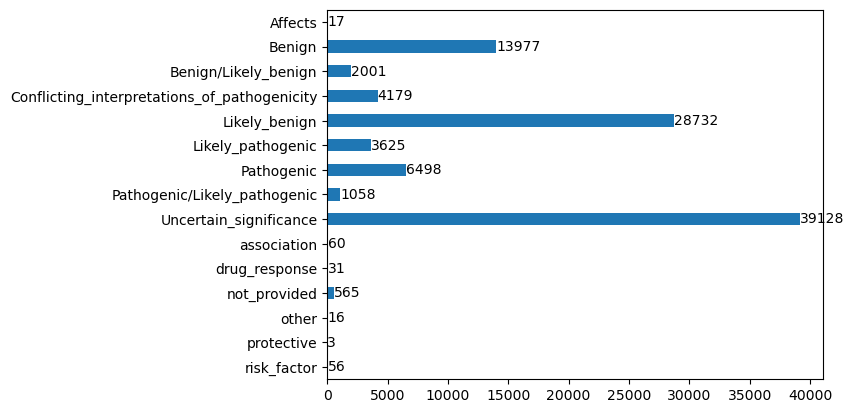

In [354]:
ax = counttemp.plot.barh()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Problem2 RS Extract

In [355]:
RS =  vcfdata['INFO'].str.extract('(RS=.+)')
RStrip = RS[0].str.strip('RS=')
RStrip = RStrip.fillna('.')
RStrip

0        1640863258
1                 .
2                 .
3                 .
4                 .
            ...    
99967     567356824
99968     111033418
99969             .
99970             .
99971             .
Name: 0, Length: 99972, dtype: object

Problem2 Merge

In [356]:
vcfRS = vcfdata[['CHROM','POS','ID','REF','ALT']]
vcfRS.insert(5, column='RS', value=RStrip)
vcfRS

,CHROM,POS,ID,REF,ALT,RS
0,1,861332,1019397,G,A,1640863258
1,1,861336,1543320,C,T,.
2,1,861349,1648427,C,T,.
3,1,861356,1362713,T,C,.
4,1,861366,1568423,C,T,.
...,...,...,...,...,...,...
99967,1,215953361,1020626,C,G,567356824
99968,1,215953365,48357,G,A,111033418
99969,1,215953366,1571402,G,T,.
99970,1,215953368,1403889,T,A,.


Problem2 Output

In [359]:
vcfRS.to_csv('HW2_2_python_r12631055.txt', sep='\t', index=False)